<h3 align="center">Huge Stock Market Dataset</h3> 

* 출처 : https://www.kaggle.com/kratisaxena/stock-market-technical-indicators-visualization
* 목저 : 분석 및 학습

In [82]:
import numpy as np
import pandas as pd

import os
# os module 요약
#    :  for interacting with the operating system
#    :  portable way
# >> * os./* and./* os.path modules를 중심으로 파일 시스템을 interacting하기 위한 주요 Function들이 있음.
# >> Examples)__ 'os.name', 'os.getwd()', 'os.error', 'os.popen()', 'os.close', os.rename

import random
import copy
import matplotlib.pyplot as plt
import pandas

In [83]:
os.getcwd()
# os.chdir('./input/Data/Stocks')
list = os.listdir()
number_files = len(list)
print(number_files)

7195



- [x for x in os.listdir() if x.endswith('.txt') and os.path.getsize(os.path.join('',x)) > 0]
    * x for x : 
        - Ex)__ [x*x for x in range(10)] >> [0, 1, 4, 9, 16, 25, 36, 49, 64, 81]
    * x for x with if
        - Ex)__ primes = [x for x in range(2, 50) if x not in noprimes] 이는 하단의 loop와 같다.
                       ~ primes = []
                            for x in range(2,50):
                               if x not in noprimes:
                                   primes.append(x) 
- endswitch() 
    * string.endswith(value, start, end)
        : 지정한 'value'로 'string'이 마침 된다면 'True'를 반환.  
- os.path.getsize()    
    * Print the size (in bytes) 
- os.path.join()    
    * Ex)__ print(os.path.join(path, "User/Public/", "Documents", "")) ~ /home/User/Public/Documents/
    


######  <font color='blue'>공파일이 아닌 txt파일 중 8개 파일을 random으로 호출</font>

In [84]:
filenames = random.sample([x for x in os.listdir() if x.endswith('.txt') 
                           and os.path.getsize(os.path.join('',x)) > 0], 8)
print(filenames)

['ango.us.txt', 'uvv.us.txt', 'boss.us.txt', 'wiw.us.txt', 'pfs.us.txt', 'lvhd.us.txt', 'wpm.us.txt', 'ggt.us.txt']


######  <font color='blue'>Data_frame 생성</font>

In [85]:
data = []
for filename in filenames:
    df = pd.read_csv(os.path.join('',filename), sep=',')
    label, _, _ = filename.split(sep='.')
    df['Label'] = label
    df['Date'] = pd.to_datetime(df['Date'])

    data.append(df)

In [86]:
data[0].tail()

,Date,Open,High,Low,Close,Volume,OpenInt,Label
3196,2017-11-06,17.12,17.290,16.980,17.10,118572,0,ango
3197,2017-11-07,17.09,17.095,16.660,16.78,91185,0,ango
3198,2017-11-08,16.70,16.960,16.570,16.95,156960,0,ango
3199,2017-11-09,16.89,17.130,16.805,17.00,119013,0,ango
3200,2017-11-10,16.95,17.170,16.690,16.70,132371,0,ango


In [87]:
print(len(data))

8


##### <font color='green'>객체복사의 종류</font>
###### Shallow copy / Deep copy
* 단순 객체복제 :
        변수만 복사하기 때문에 바라보는 객체는 당연히 동일 반면, 두개의 변수 중 하나만 변경되어도 나머지 하나가 동일하게 수정되는 현상이 발생
* Shallow copy : 
    immutable한 경우는 제외하고, 리스트의 item 내부의 객체가 동일한 객체라면, mutable한 리스트를 수정할때는 둘다 값이 변경됨
* Deep copy : 
    내부의 객체들까지 모두 새롭게 카피
    
##### <font color='red'>기술적 지표 정리</font>
* RSI, Volume (plain), Bollinger Bands, Aroon, Price Volume Trend, acceleration bands _

##### <font color='green'>객체복사의 종류</font>
###### Shallow copy / Deep copy
* 단순 객체복제 :
        변수만 복사하기 때문에 바라보는 객체는 당연히 동일 반면, 두개의 변수 중 하나만 변경되어도 나머지 하나가 동일하게 수정되는 현상이 발생
* Shallow copy : 
    immutable한 경우는 제외하고, 리스트의 item 내부의 객체가 동일한 객체라면, mutable한 리스트를 수정할때는 둘다 값이 변경됨
* Deep copy : 
    내부의 객체들까지 모두 새롭게 카피
    
##### <font color='red'>기술적 지표 정리</font>
* RSI, Volume (plain), Bollinger Bands, Aroon, Price Volume Trend, acceleration bands _1
* Stochastic, Chaikin Money Flow, Parabolic SAR, Rate of Change, Volume weighted average Price, momentum _2
* Commodity Channel Index, On Balance Volume, Keltner Channels, Triple Exponential Moving _3 
* Average Normalized Averager True Range ,directional movement indicators _4
* MACD, Money flowindex, Ichimoku, William %R, Volume MINMAX, adaptive moving average _5    

In [88]:
TechIndicator = copy.deepcopy(data)

##### <font color='red'>RSI(Relative Strength index)</font>
* 주식, 선물, 옵션 등의 기술적분석에 사용되는 보죠지표임.
* 상대강도지수라고 부르며, 가격의 상승압력과 하락입력간의 상대적인 강도를 나타내는 지표임
    : 즉 RSI는 주가의 상승추세와 비례하며, <font color = 'blue'>하단과 같이 구체적인 공식에 근거해 해석</font>

* U = 전날 주가보다 오늘 주가가 상승할 때의 주가 상승폭
* D = 전날 주가보다 오늘 주가가 하락할 때의 주가 상승폭
* AU = 일정기간(n)일 동안의 U의 평균값(Average ups)
* AD = 일정기간(n)일 동안의 D의 평균값(Average down)
* RS = AU/AD
* RSI = AU/(AU+AD) = RS/(1+RS)
```
Avg(PriceUp)/(Avg(PriceUP)+Avg(PriceDown)*100 
Where: PriceUp(t)=1*(Price(t)-Price(t-1)){Price(t)- Price(t-1)>0}
PriceDown(t)=-1*(Price(t)-Price(t-1)){Price(t)- Price(t-1)<0}
```

* RSI 시그널 = RSI의 이동평균선


###### 0과 1사이의 값으로 Scaling 및 AU가 클수록 RSI는 1로 수렴 / AD가 클수록 0으로 수렴 _1
###### N은 사용자가 임의로 정할 수 있는 파라미터 통산적으론 14일을 기준으로 책정 _2
###### RSI의 SIGNAL은 이동평균선이며, 6일 동안의 이동평균을 사용함 _3


In [89]:
# RSI 사용자정의함수 생성

# 0보다 큰 값과 작은 값의 절대값의 평균을 통해 각. AU, AD값을 정의 및 
# AU/(AU+AD) 즉, RSI의 백분위 수 출력
def rsi(values):
    up = values[values>0].mean()
    down = -1*values[values<0].mean()
    return 100 * up / (up + down)

In [90]:
# Momentum_1D >> 장 마감가를 기준으로 전날대비 가격차를 계산
# RSI_14D >> 14일을 기준으로 rolling하여 Rsi의 백분위 수 게산
# Volume_plain >> 결측값 0으로 처리 >> 정보가 기록되지 않은 것이라 가정햇기 때문일 것
for stock in range(len(TechIndicator)):
    TechIndicator[stock]['Momentum_1D'] = (TechIndicator[stock]['Close']-TechIndicator[stock]['Close'].shift(1)).fillna(0)
    TechIndicator[stock]['RSI_14D'] = TechIndicator[stock]['Momentum_1D'].rolling(center=False, window=14).apply(rsi).fillna(0)
    TechIndicator[stock]['Volume_plain'] = TechIndicator[stock]['Volume'].fillna(0)

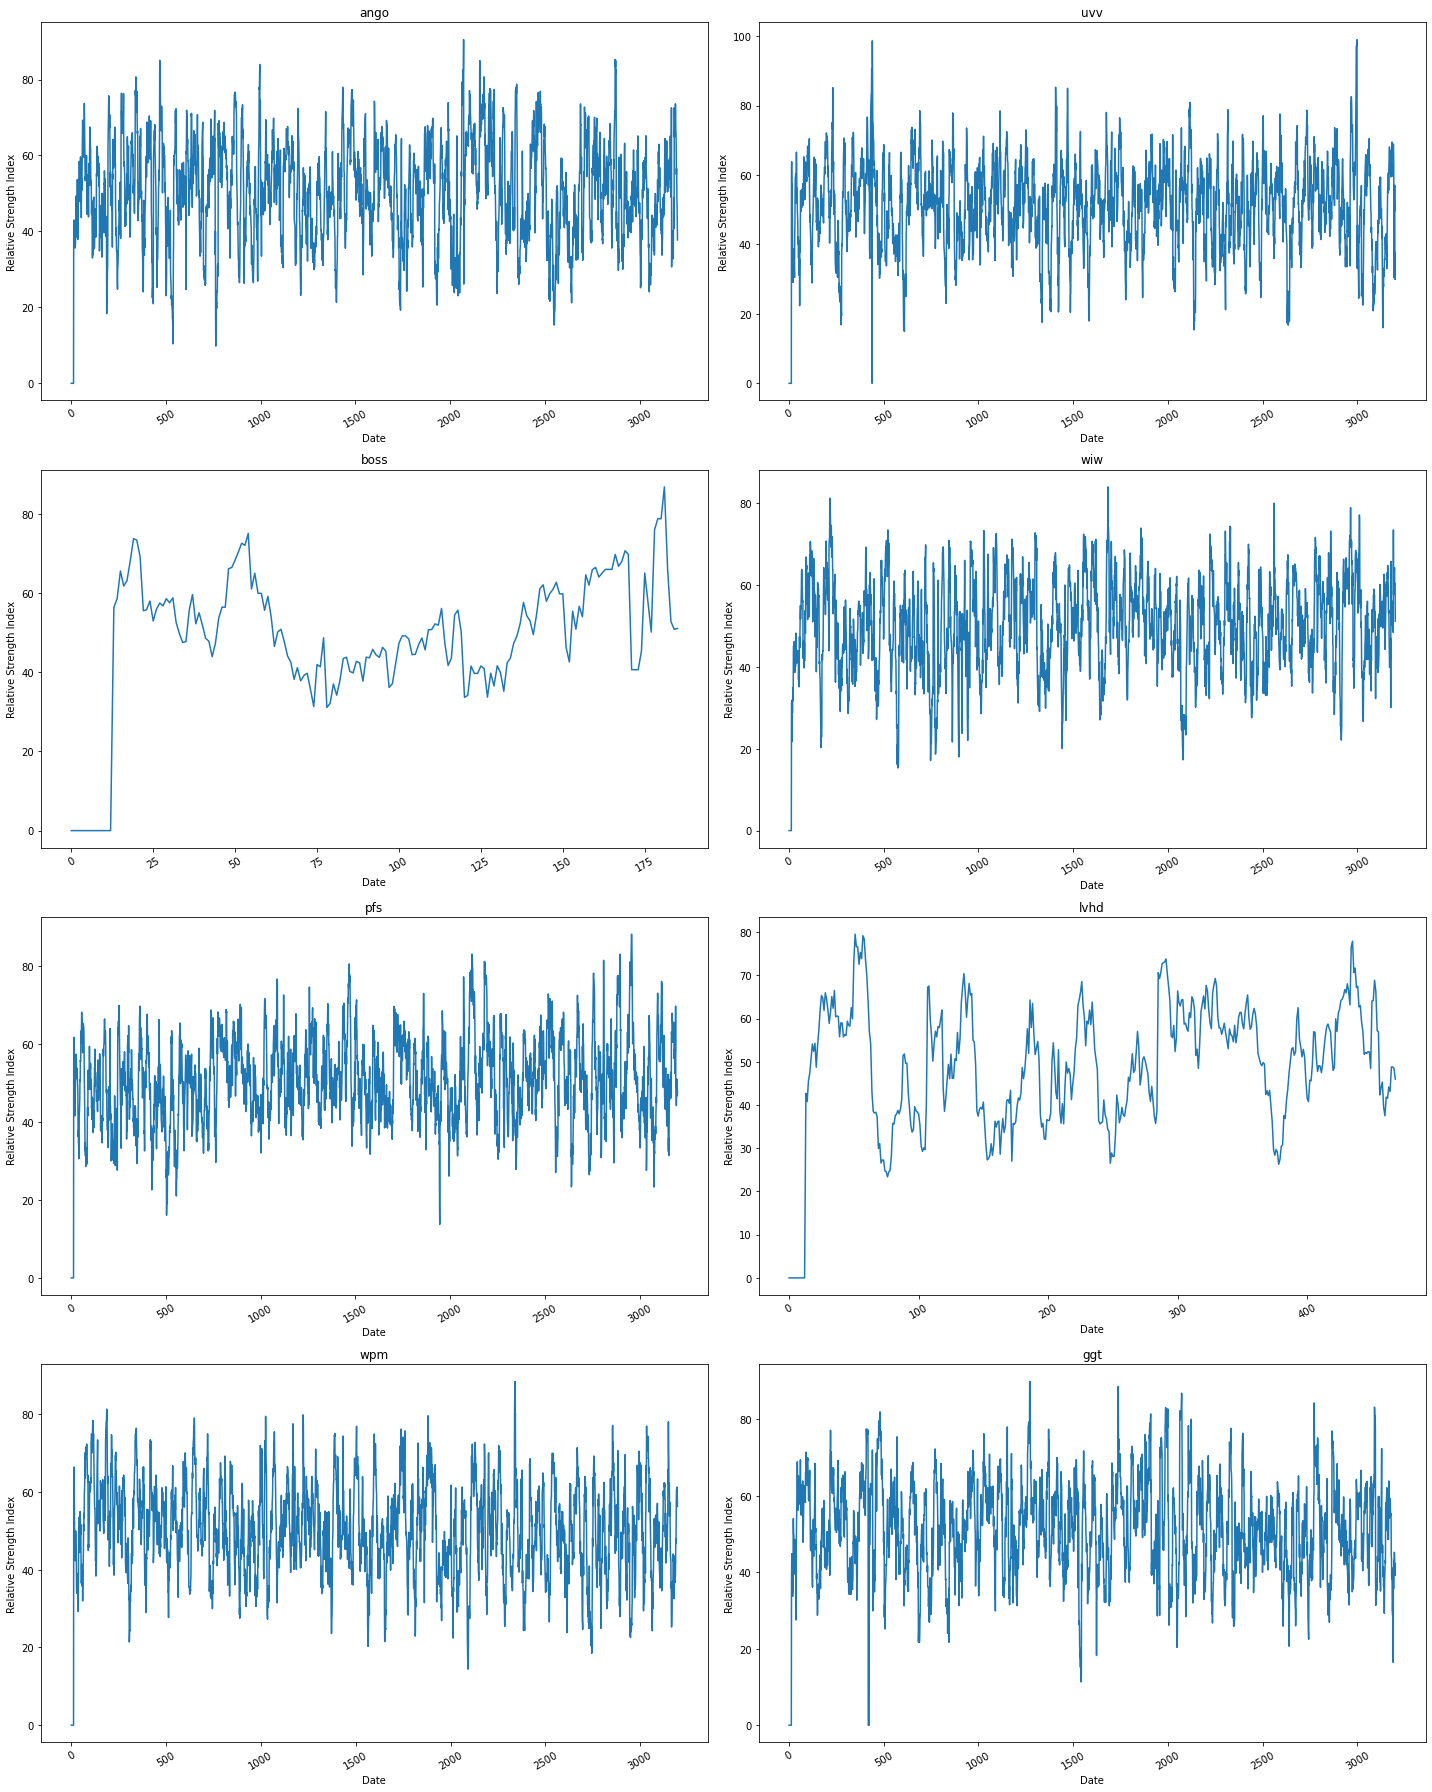

In [161]:
# RSI Plot
fig = plt.figure(figsize=(20,25))
for i in range(len(TechIndicator)):
    ax = plt.subplot(4,2,i+1)
    ax.plot(TechIndicator[i].index, TechIndicator[i]['RSI_14D'])
    ax.set_title(str(TechIndicator[i]['Label'][0]))
    ax.set_xlabel("Date")
    ax.set_ylabel("Relative Strength Index")
    plt.xticks(rotation=30)
fig.tight_layout()

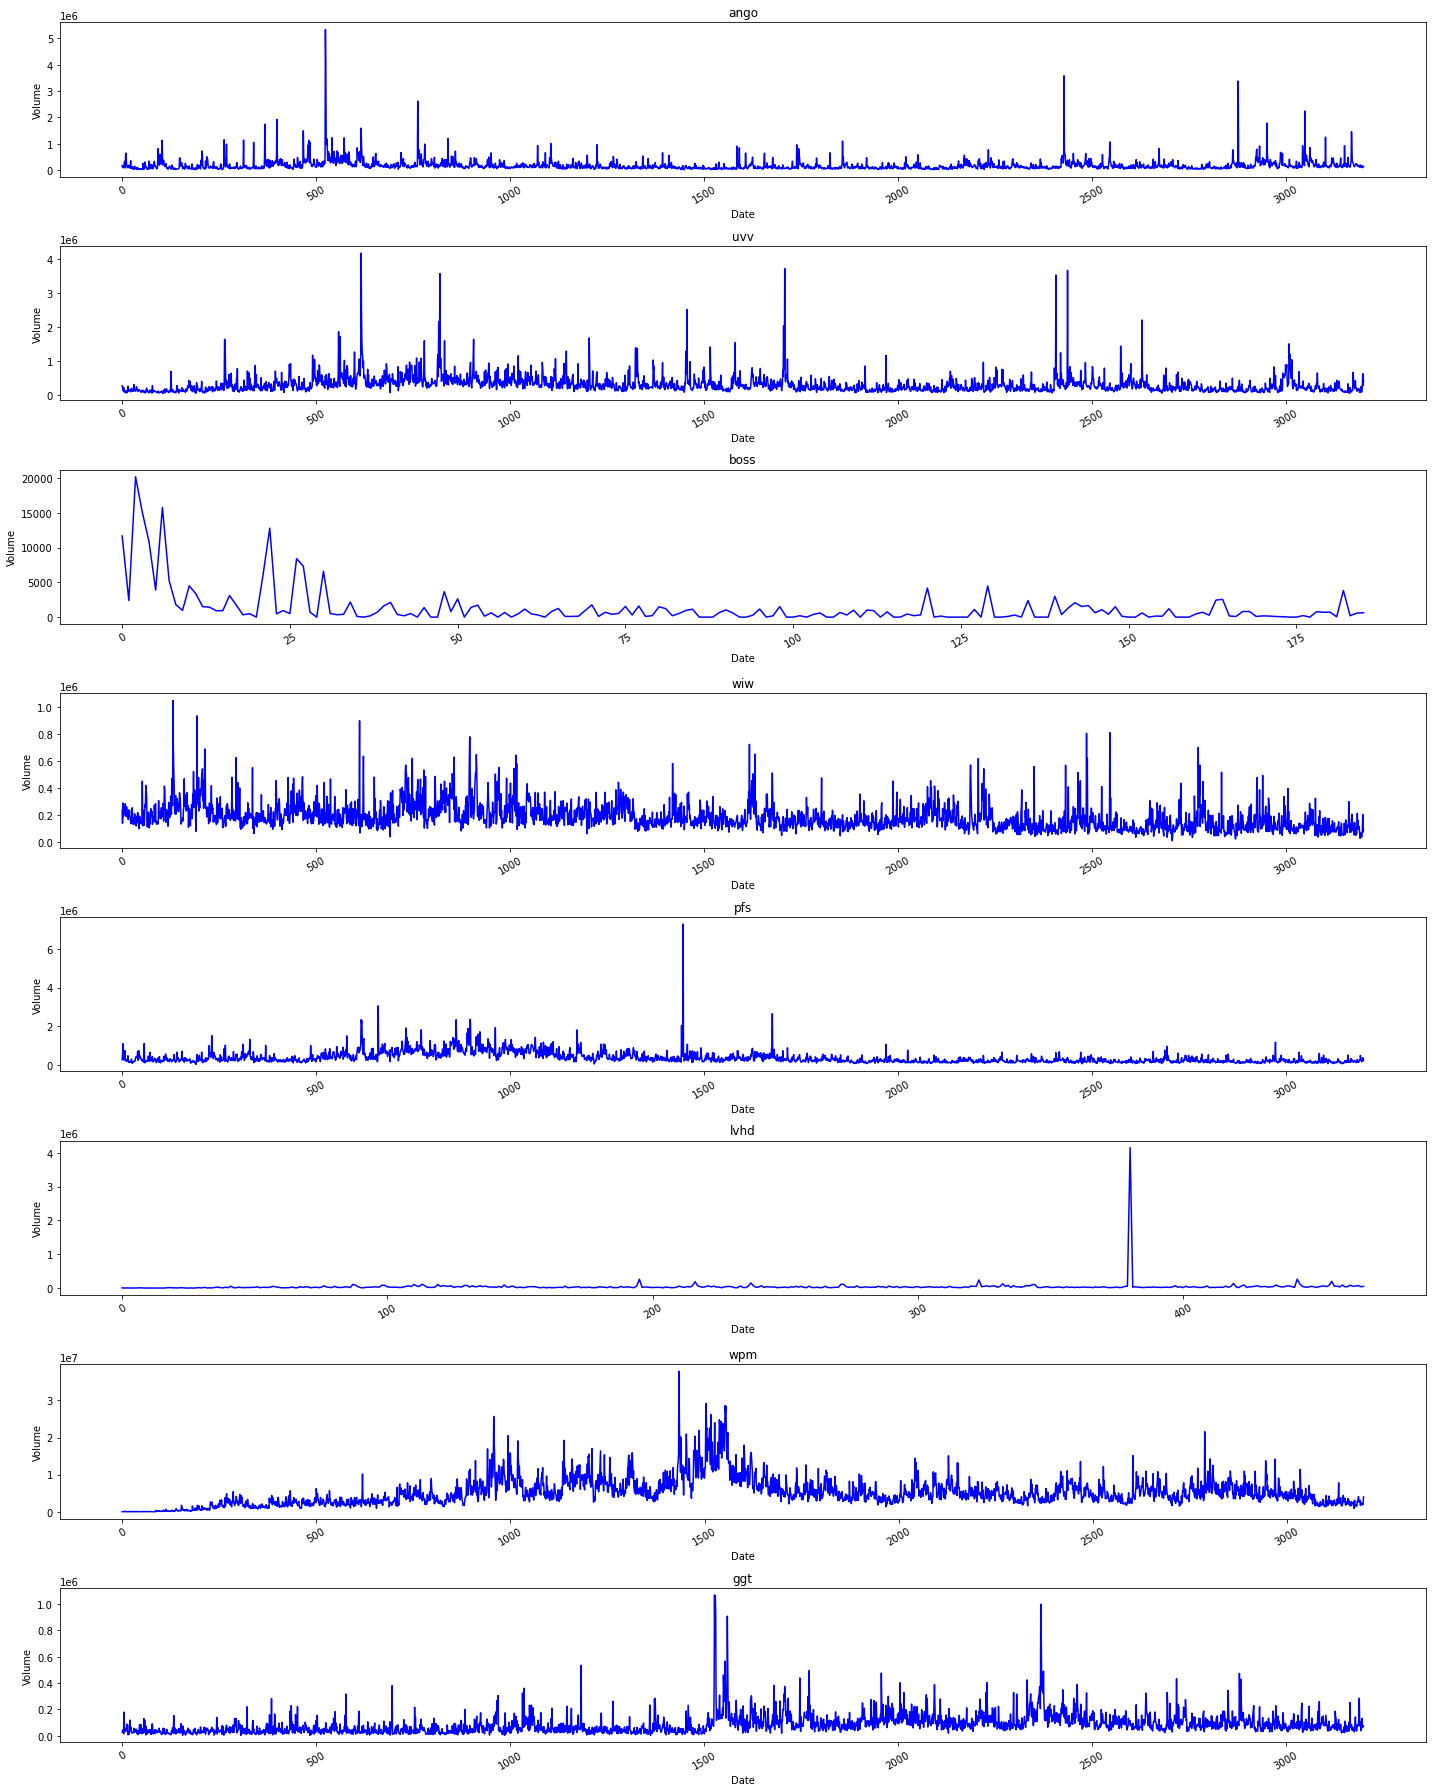

In [162]:
# Volume Plain plot
fig = plt.figure(figsize=(20,25))
for i in range(8):
    ax = plt.subplot(8,1,i+1)
    ax.plot(TechIndicator[i].index, TechIndicator[i]['Volume_plain'], 'b')
    ax.set_title(str(TechIndicator[i]['Label'][0]))
    ax.set_xlabel("Date")
    ax.set_ylabel("Volume")
    plt.xticks(rotation=30)
fig.tight_layout()

##### Bollinger Bands in python참고자료 : https://codingandfun.com/bollinger-bands-pyt/
##### Bollinger Bands 주식 용어 및 수식 참고자료 : 
https://m.blog.naver.com/PostView.nhn?blogId=kks3285&logNo=221229220122&proxyReferer=https:%2F%2Fwww.google.com%2F

* 주가의 상대적 높고 낮음에 대한 판단 목적의 기술적 분석도구
* 이동평균선 중심으로 표준편차 범위 안에서 움직인다

###### 구성
* 중심선 : n일 동안의 이동평균선
* 상단선 : 중심선 + k배 표준편차 상위밴드
* 하단선 : 중심선 + k배 표준편차 하위밴드
통상 n=20,k=2
###### <font color='red'>Bolinger Bands Formulas</font>
* mbb = 중심선 = 주가의 20 기간 이동평균선 = clo20
* ubb = 상한선 = 중심선 + 주가의 20기간 표준편차 * 2
* lbb = 하한선 = 중심선 – 주가의 20기간 표준편차 * 2
* perb = %b = (주가 – 하한선) / (상한선 – 하한선) = (close - lbb) / (ubb - lbb)
* bw = 밴드폭 (Bandwidth) = (상한선 – 하한선) / 중심선 = (ubb - lbb) / mbb

In [91]:
# Bolinger Band 사용자정의함수 생성
# '평균(average)'과 '표준편차(standard deviation)' return 상한, 하한값 
def bbands(price, length=30, numsd=2):
    ave = price.rolling(window = length, center = False).mean()
    sd = price.rolling(window = length, center = False).std()
    
    upband = ave + (sd*numsd)
    dnband = ave - (sd*numsd)
    return np.round(ave,3), np.round(upband,3), np.round(dnband,3) 

In [92]:
# 장 마감 price, length = 20, n = 1 일 때, 
# ave = 'Bolinger Middle Band'
# upband = 'Bolinger Uper Band'
# dnband = 'Bolinger Lower Band' (Nan = 0)

for stock in range(len(TechIndicator)):
    TechIndicator[stock]['BB_Middle_Band'], TechIndicator[stock]['BB_Upper_Band'], TechIndicator[stock]['BB_Lower_Band'] = bbands(TechIndicator[stock]['Close'], length=20, numsd=1)
    TechIndicator[stock]['BB_Middle_Band'] = TechIndicator[stock]['BB_Middle_Band'].fillna(0)
    TechIndicator[stock]['BB_Upper_Band'] = TechIndicator[stock]['BB_Upper_Band'].fillna(0)
    TechIndicator[stock]['BB_Lower_Band'] = TechIndicator[stock]['BB_Lower_Band'].fillna(0)

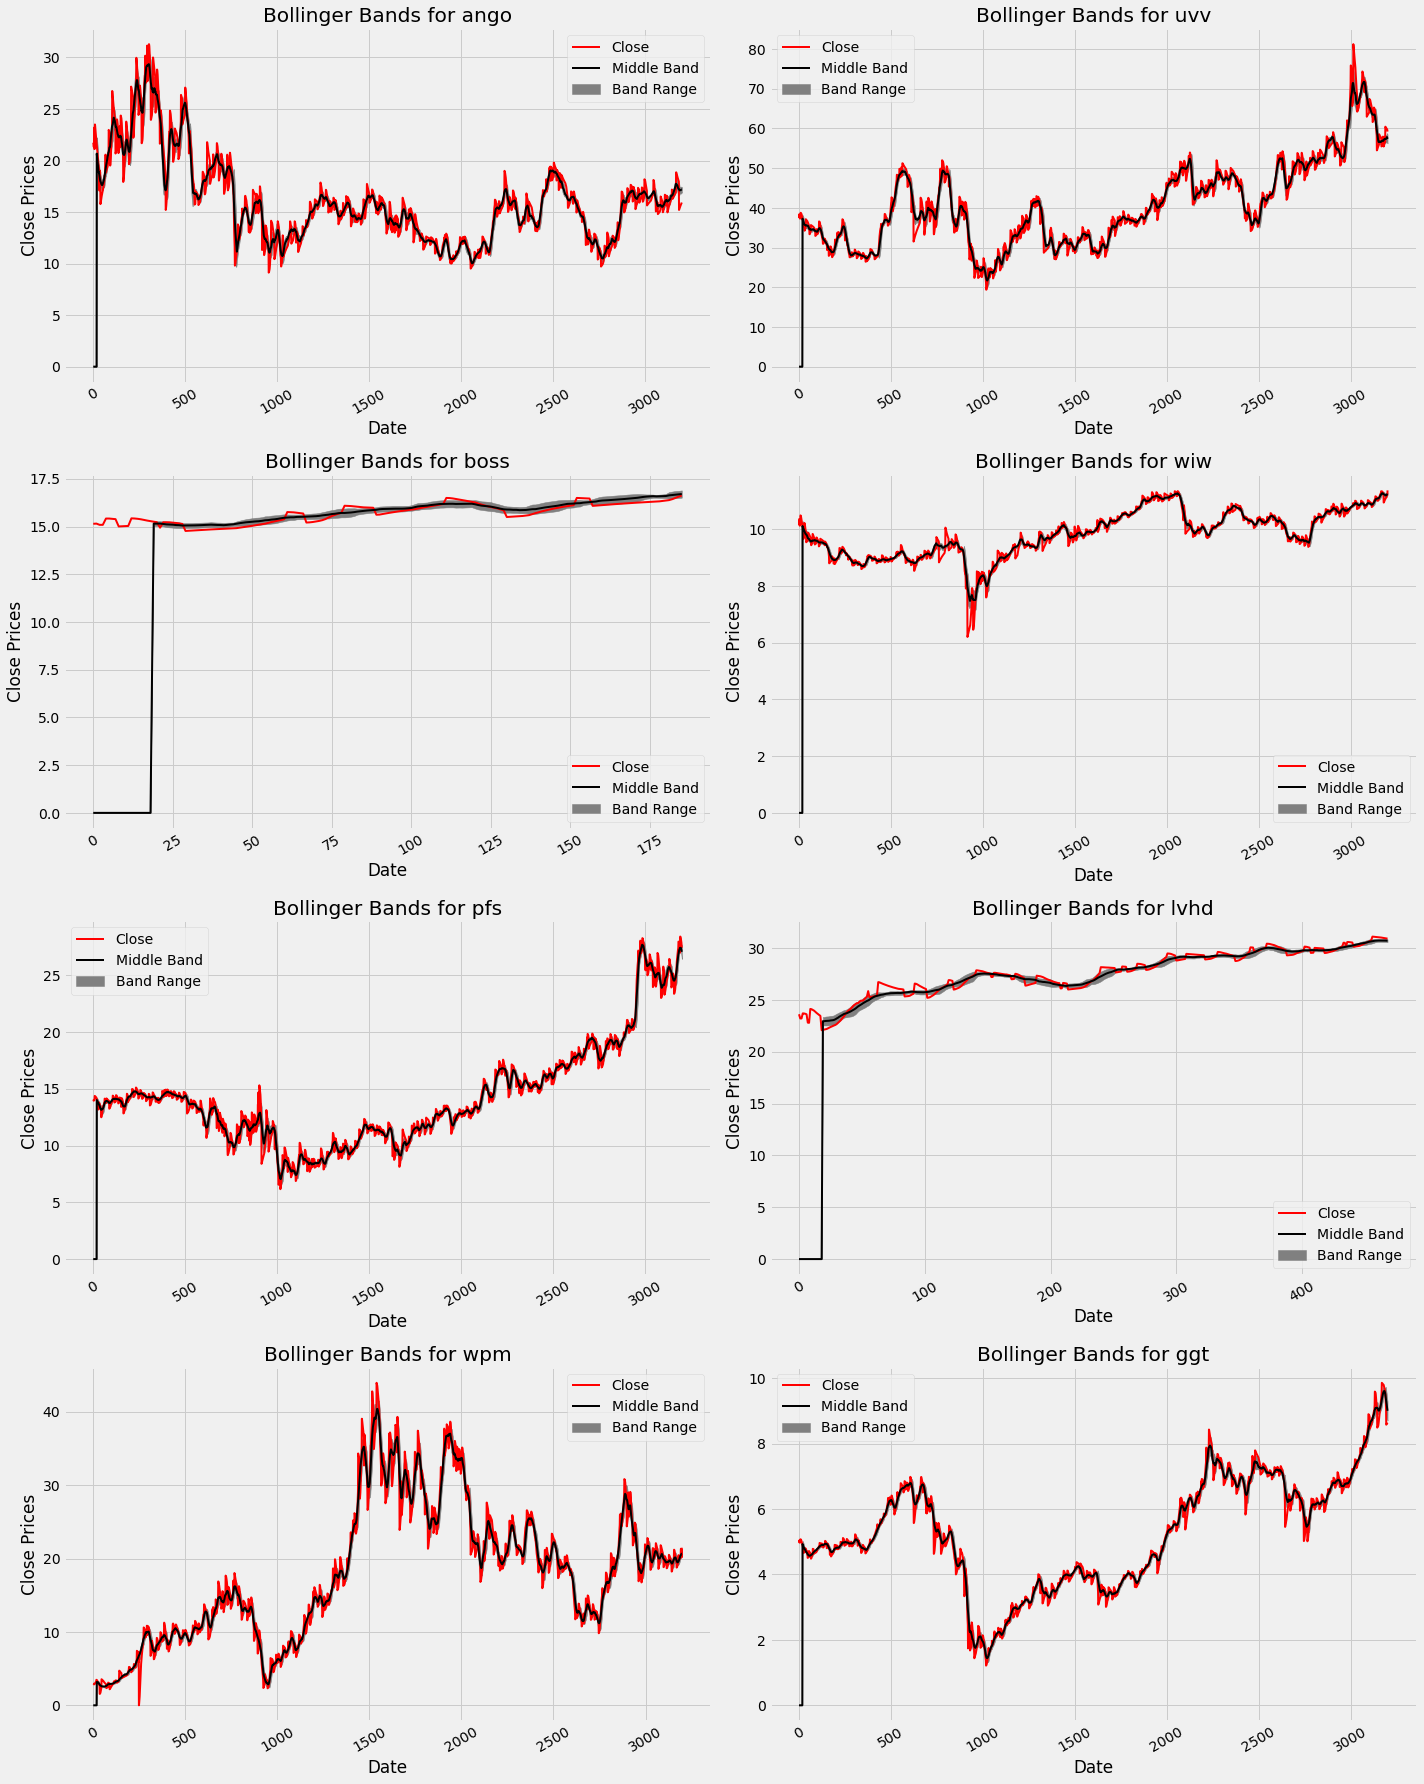

In [163]:
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(20,25))
for i in range(8):
    ax = plt.subplot(4,2,i+1)
    ax.fill_between(TechIndicator[i].index, TechIndicator[i]['BB_Upper_Band'], TechIndicator[i]['BB_Lower_Band'], color='grey', label="Band Range")
    # Plot Adjust Closing Price and Moving Averages
    ax.plot(TechIndicator[i].index, TechIndicator[i]['Close'], color='red', lw=2, label="Close")
    ax.plot(TechIndicator[i].index, TechIndicator[i]['BB_Middle_Band'], color='black', lw=2, label="Middle Band")
    ax.set_title("Bollinger Bands for " + str(TechIndicator[i]['Label'][0]))
    ax.legend()
    ax.set_xlabel("Date")
    ax.set_ylabel("Close Prices")
    plt.xticks(rotation=30)
fig.tight_layout()

##### Aroon Oscillator참고자료 : http://blog.naver.com/PostView.nhn?blogId=ntkor&logNo=200061827#:~:text=Aroon%20Oscillator&text=%2D100%20~%20100%20%EC%82%AC%EC%9D%B4%EC%9D%98%20%EA%B0%92,%EC%9C%BC%EB%A1%9C%20%EC%A7%84%EB%8F%99%ED%95%98%EB%8A%94%20%EA%B7%B8%EB%9E%98%ED%94%84%20%EC%9D%B4%EB%8B%A4.

###### 구성
* Aroon Up, Aroon Down  
    * Aroon Up = ((N - Days since N - period High)/N) * 100
    * Aroon Down = ((N - Days since N - period Low)/N) * 100
 
###### 지표해석 _1
* 이 지표는 0 ~ 100사이 값을 가지고 위 아래로 움직이며, 25구간을 기본값으로 함
* 가장 기본적인 해석은 Aroon-Up이 50보다 크고 Aroon-Down이 50보다 작을 때는 상승세가 우세
* 각각이 50보다 작거나, 50보다 클 결우 하락세를 의심한다.

###### 지표해석 _2
* <font color='red'>Aroon Up / Down 지표가 100으로 접근한다는 것은 새로운 추세가 나타날 가능성이 높음 </font>
    * Ex)_ 반대 지표가 30 이하에 머물면 추세 발생 확률이 좀더 높은 것으로 볼 수 있음 (Up100 Down 30, 상승세가 발생할 확률이 높음)
    


In [93]:
# Testcode
# ((TechIndicator[0]['High'][0:25].tolist().index(max(TechIndicator[0]['High'][0:25]))))/float(25)*100

In [94]:
def aroon(df, tf=25):
    aroonup = []
    aroondown = []
    x = tf
    while x< len(df['Date']):
        aroon_up = ((df['High'][x-tf:x].tolist().index(max(df['High'][x-tf:x])))/float(tf))*100
        aroon_down = ((df['Low'][x-tf:x].tolist().index(min(df['Low'][x-tf:x])))/float(tf))*100
        aroonup.append(aroon_up)
        aroondown.append(aroon_down)
        x+=1
    return aroonup, aroondown

In [95]:
for stock in range(len(TechIndicator)):
    listofzeros = [0] * 25
    up, down = aroon(TechIndicator[stock])
    aroon_list = [x - y for x, y in zip(up,down)]
    if len(aroon_list)==0:
        aroon_list = [0] * TechIndicator[stock].shape[0]
        TechIndicator[stock]['Aroon_Oscillator'] = aroon_list
    else:
        TechIndicator[stock]['Aroon_Oscillator'] = listofzeros+aroon_list
TechIndicator[0]['Aroon_Oscillator'].tail(10)

3191    -4.0
3192    -4.0
3193    -4.0
3194    64.0
3195    60.0
3196    24.0
3197    24.0
3198    24.0
3199    24.0
3200    24.0
Name: Aroon_Oscillator, dtype: float64

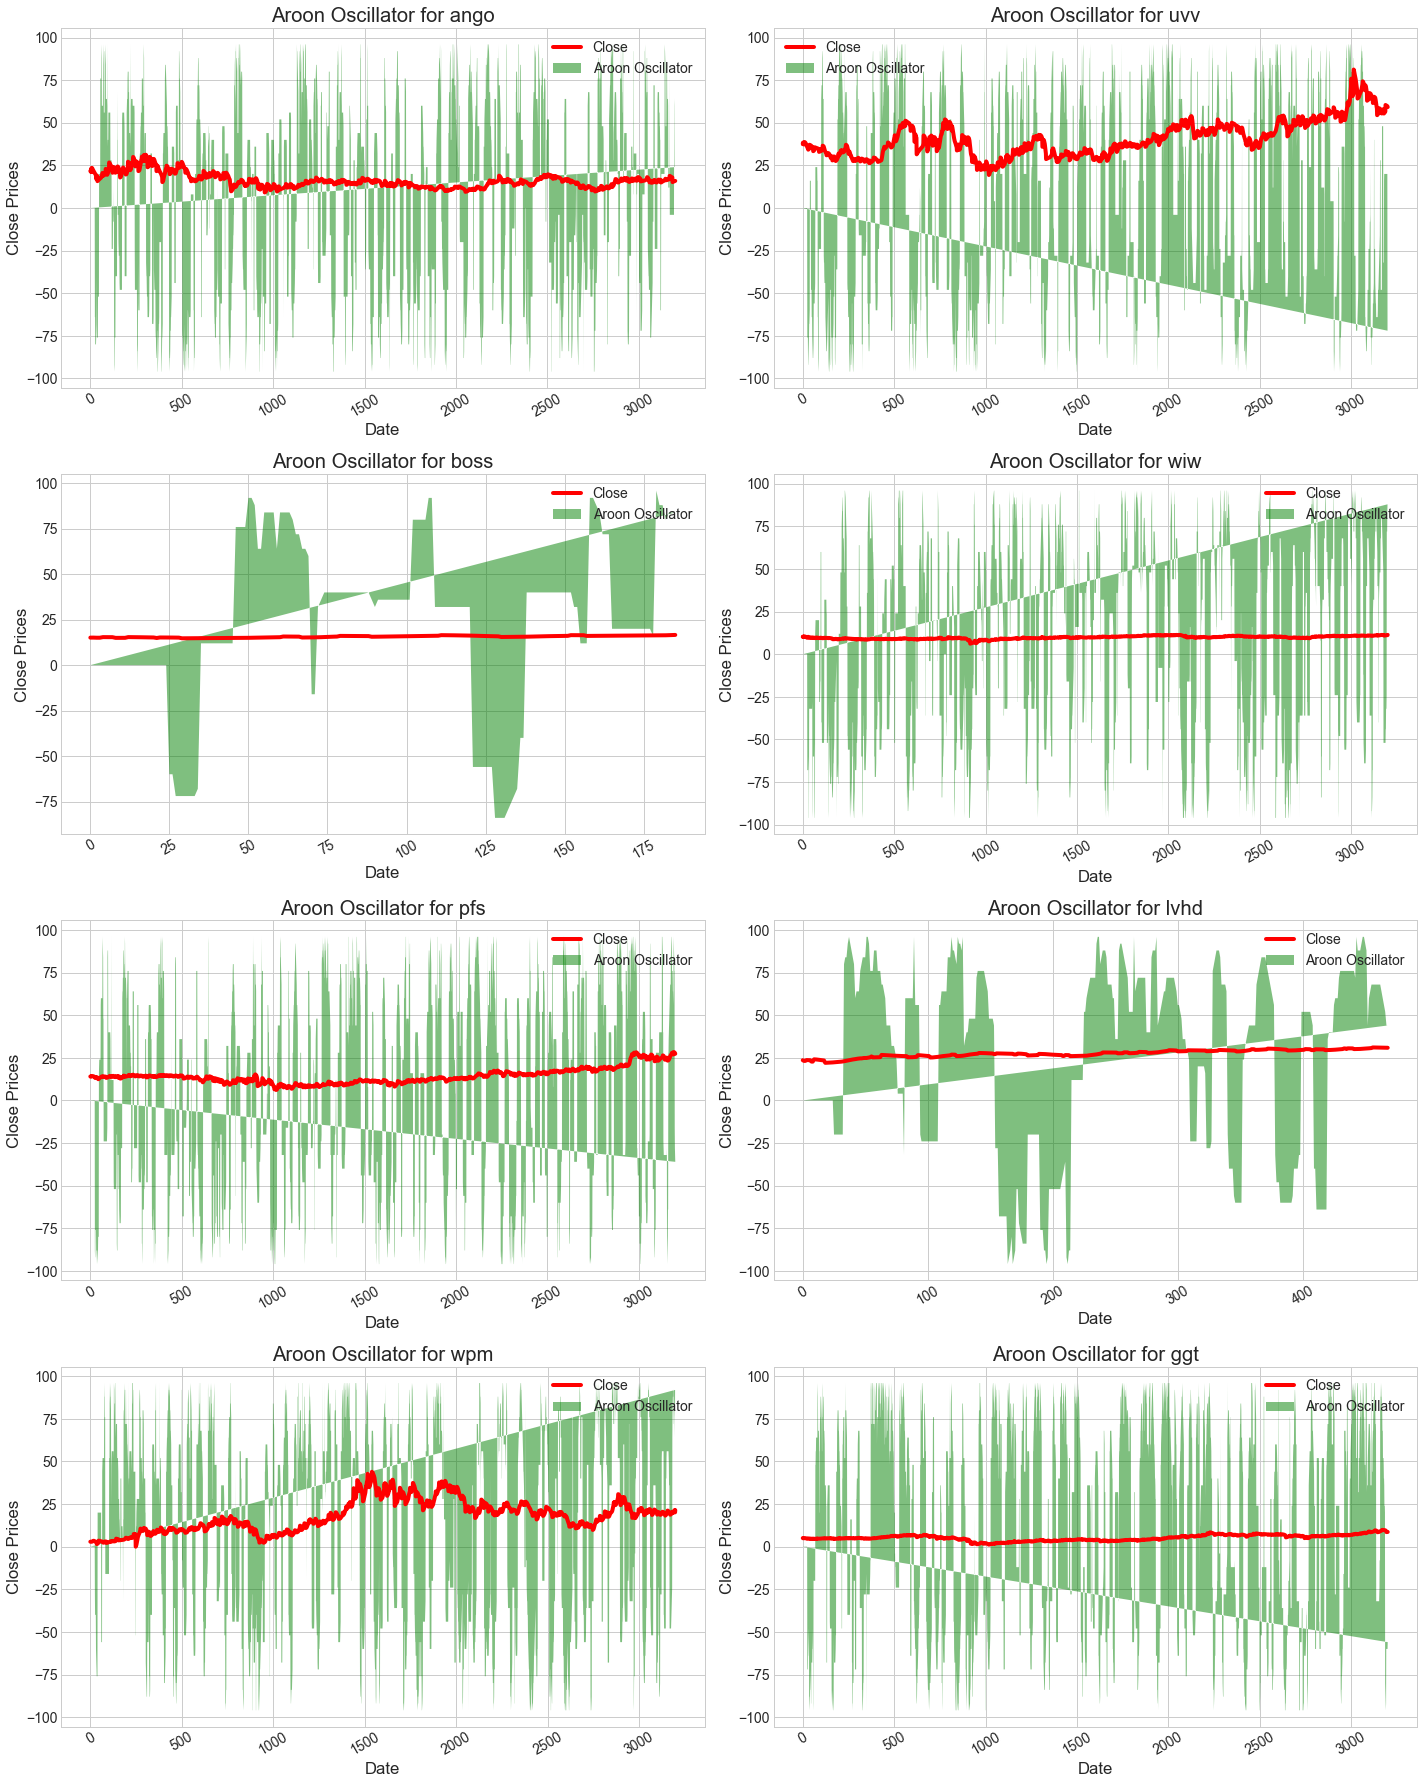

In [164]:
# Aroon Oscillator Plot
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,25))
for i in range(8):
    ax = plt.subplot(4,2,i+1)
    ax.fill(TechIndicator[i].index, TechIndicator[i]['Aroon_Oscillator'],'g', alpha = 0.5, label = "Aroon Oscillator")
    ax.plot(TechIndicator[i].index, TechIndicator[i]['Close'], 'r', label="Close")
    ax.set_title("Aroon Oscillator for " +str(TechIndicator[i]['Label'][0]))
    ax.legend()
    ax.set_xlabel("Date")
    ax.set_ylabel("Close Prices")
    plt.xticks(rotation=30)
fig.tight_layout()

###### PVT(Price Volume Trend) = {(단일종가 - 전일종가) / 전일종가} * 단일거래량 + 전일PVT
* 참고자료 : https://layhope.tistory.com/495

In [96]:
for stock in range(len(TechIndicator)):
    TechIndicator[stock]["PVT"] = (TechIndicator[stock]['Momentum_1D']/ TechIndicator[stock]['Close'].shift(1))*TechIndicator[stock]['Volume']
    TechIndicator[stock]["PVT"] = TechIndicator[stock]["PVT"]-TechIndicator[stock]["PVT"].shift(1)
    TechIndicator[stock]["PVT"] = TechIndicator[stock]["PVT"].fillna(0)

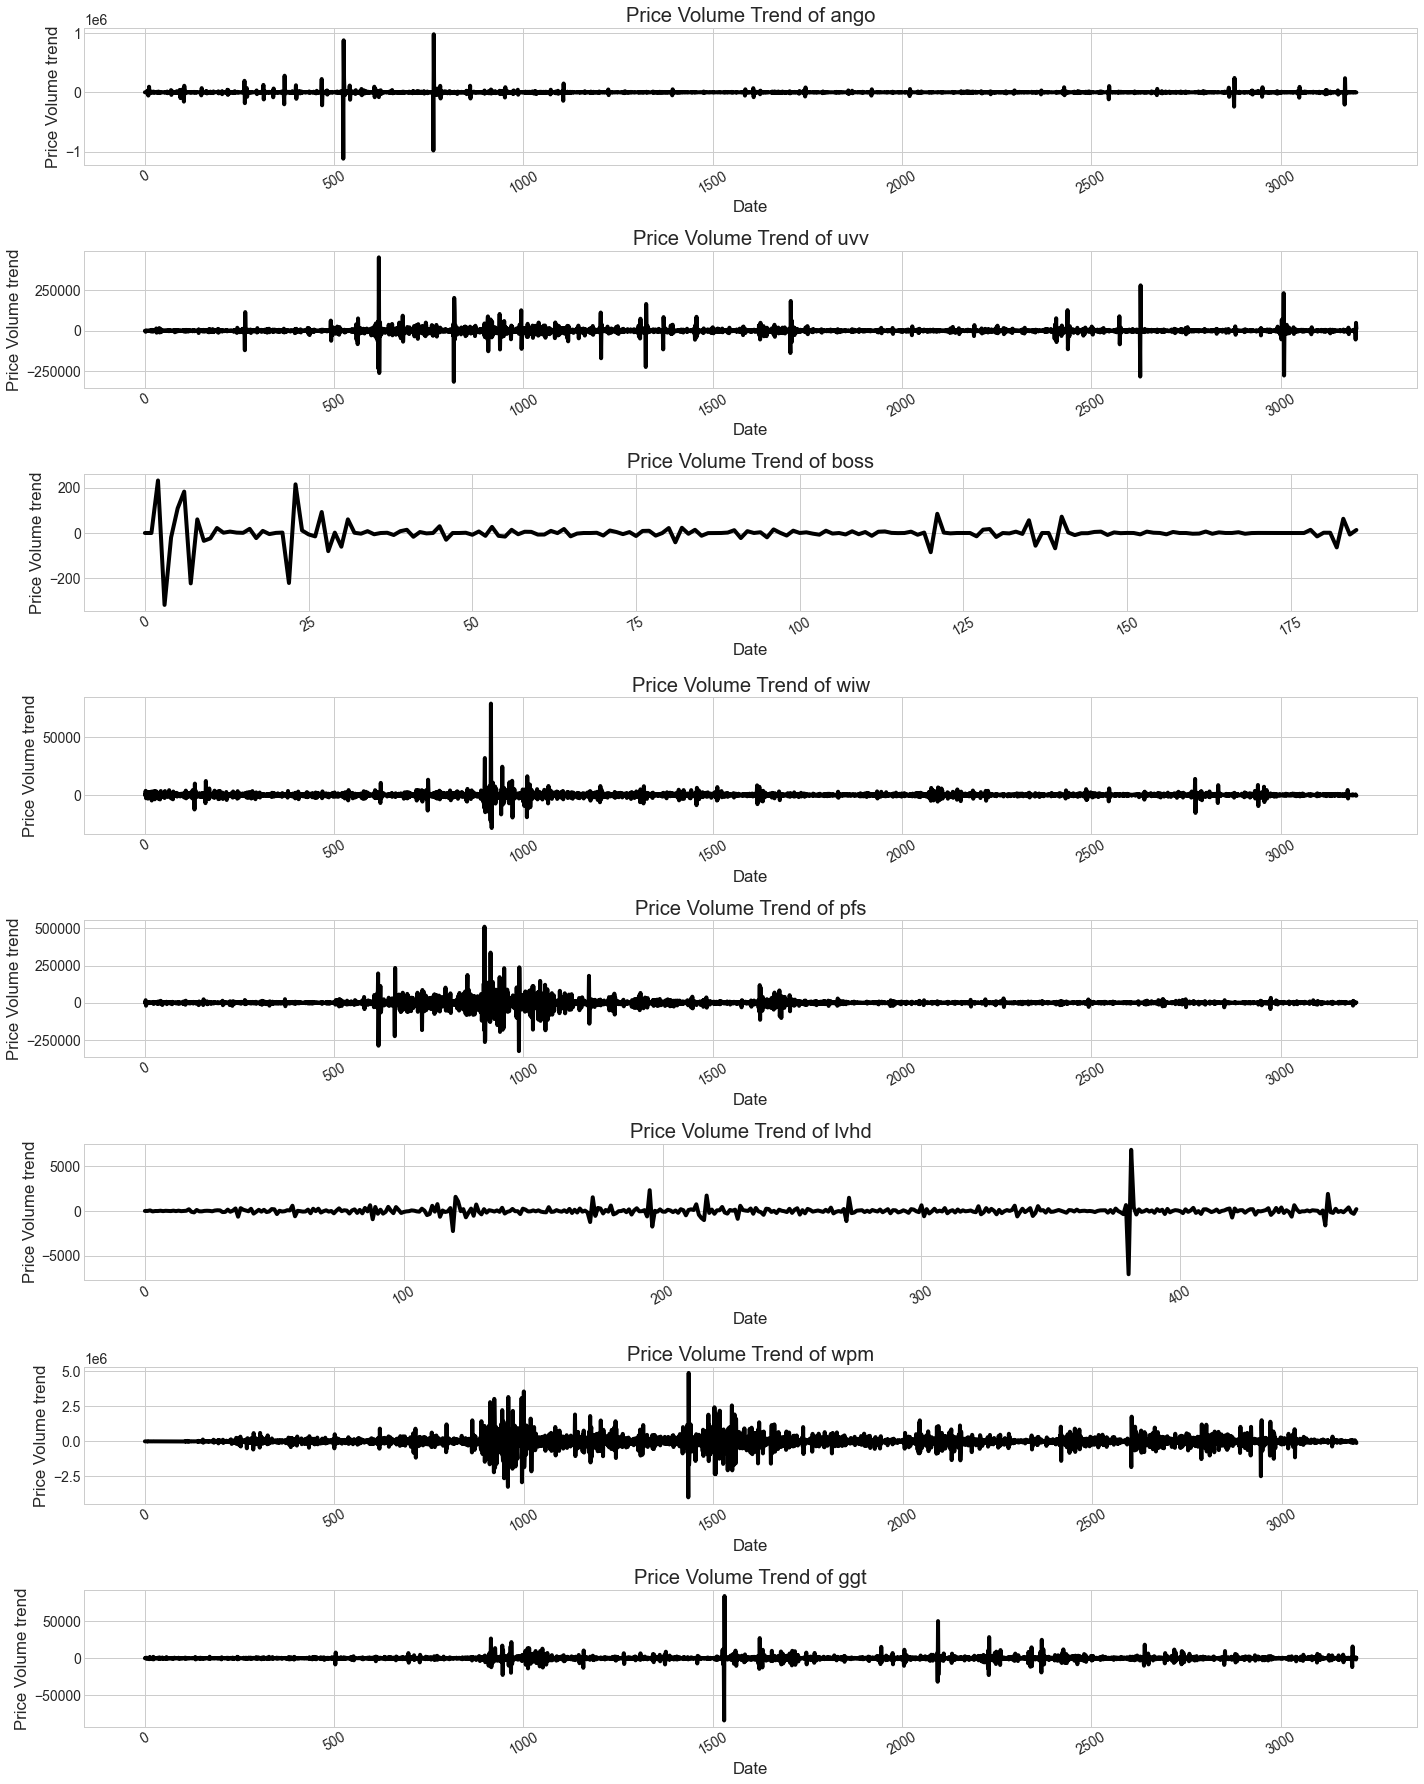

In [165]:
# PRice Volume Trend Plot
fig = plt.figure(figsize=(20,25))
for i in range(8):
    ax = plt.subplot(8,1,i+1)
    ax.plot(TechIndicator[i].index, TechIndicator[i]['PVT'], 'black')
    ax.set_title("Price Volume Trend of " +str(TechIndicator[i]['Label'][0]))
    ax.set_xlabel("Date")
    ax.set_ylabel("Price Volume trend")
    plt.xticks(rotation=30)
fig.tight_layout()

###### Acceleration Bands

In [97]:
def abands(df):
    df['AB_Middle_Band'] = df['Close'].rolling(window = 20, center=False).mean()
    df['aupband'] = df['High'] * (1 + 4 * (df['High']-df['Low'])/(df['High']+df['Low']))
    df['AB_Upper_Band'] = df['aupband'].rolling(window=20, center=False).mean()
    df['adownband'] = df['Low'] * (1 - 4 * (df['High']-df['Low'])/(df['High']+df['Low']))
    df['AB_Lower_Band'] = df['adownband'].rolling(window=20, center=False).mean()

In [98]:
for stock in range(len(TechIndicator)):
    abands(TechIndicator[stock])
    TechIndicator[stock] = TechIndicator[stock].fillna(0)

In [99]:
# Drop unwanted columns
colums2Drop = ['Momentum_1D','aupband','adownband']
for stock in range(len(TechIndicator)):
    TechIndicator[stock] = TechIndicator[stock].drop(labels = colums2Drop, axis=1)

###### Stochastic Oscillator(%K and %D)

In [100]:
def STOK(df, n):
    df['STOK'] = ((df['Close'] - df['Low'].rolling(window=n, center=False).mean()) / (df['High'].rolling(window=n, center=False).max() - df['Low'].rolling(window=n, center=False).min())) * 100
    df['STOD'] = df['STOK'].rolling(window = 3, center=False).mean()

In [101]:
for stock in range(len(TechIndicator)):
    STOK(TechIndicator[stock], 4)
    TechIndicator[stock] = TechIndicator[stock].fillna(0)

###### Chaikin Money Flow

* 참고자료 : https://blog.naver.com/PostView.nhn?blogId=autumnis&logNo=222057485370
    * Sum((((C-L)-(H-L))/(H-L))*V, time) / Sum(V, time),  Time = 21 - 22구간
            * C : Center
            * L : Low
            * H : High
            * V : Volumn
: 매우 단순한 접근에 해당한다. 유도된 식을 풀이해보자면 변동폭에서 중앙부터 상한선까지 Volume값을 기준단위로하여 상승빈도가 유동 range 안에서 얼마 만큼 점유하고 있는지를 (약 20ㅇ르 주기로 ) 평가하는 지표이다.

: 주가 해석에서 모든 값은 상대적인 값이다.
위와 같은 CMF가 유용할 수 있는 것은 주가가 하락세를 보이더라도 상대적 하락세이며 본질적으론 상승세인 것을 판단할 수 있도록 돕는다.

이와 같은 특징을 고려했을 때, 상관분석을 통해 주가 상승세를 기준으로 양의 상관관계, 하락세를 기준으로 음의 상관관계를 판별하여 Feature를 특정짓고 Efficient frontier 포트폴리오를 만든다면 어떨까를 고려해본다. 

In [102]:
def CMFlow(df, tf):
    CHMF = []
    MFMs = []
    MFVs = []
    x = tf
    
    while x < len(df['Date']):
        PeriodVolume = 0
        volRange = df['Volume'][x-tf:x]
        for eachVol in volRange:
            PeriodVolume += eachVol
        
        MFM = ((df['Close'][x] - df['Low'][x]) - (df['High'][x] - df['Close'][x])) / (df['High'][x] - df['Low'][x])
        MFV = MFM*PeriodVolume
        
        MFMs.append(MFM)
        MFVs.append(MFV)
        x+=1
    
    y = tf
    while y < len(MFVs):
        PeriodVolume = 0
        volRange = df['Volume'][x-tf:x]
        for eachVol in volRange:
            PeriodVolume += eachVol
        consider = MFVs[y-tf:y]
        tfsMFV = 0
        
        for eachMFV in consider:
            tfsMFV += eachMFV
        
        tfsCMF = tfsMFV/PeriodVolume
        CHMF.append(tfsCMF)
        y+=1
    return CHMF    

In [103]:
for stock in range(len(TechIndicator)):
    listofzeros = [0] * 40
    CHMF = CMFlow(TechIndicator[stock], 20)
    if len(CHMF)==0:
        CHMF = [0] * TechIndicator[stock].shape[0]
        TechIndicator[stock]['Chaikin_MF'] = CHMF
    else:
        TechIndicator[stock]['Chaikin_MF'] = listofzeros+CHMF

<ipython-input-102-ebdd63a3bbec>:13: RuntimeWarning: invalid value encountered in double_scalars
  MFM = ((df['Close'][x] - df['Low'][x]) - (df['High'][x] - df['Close'][x])) / (df['High'][x] - df['Low'][x])


###### SAR = SAR + {AF * (EP - SAR)}
* 추세전환시점을 파악할 목적으로 개발된 지표
* Parablic stop And Reverse은 주가의 추세의 끝과 시작을 점들의 포물선으로 차트에 표시해 알려주는데, 이러한 추세의 포물선의 표시 원리는 추세진행의 가속력에 착안하여 개발되어졌다. 주식은 추세가 형성되어 움직일 때 가속력이 높아지며, 추세가 전환되는 시점에는 가속력이 약해지는 특성을 활용한 것이다. 

In [104]:
def psar(df, iaf = 0.02, maxaf = 0.2):
    length = len(df)
    dates = (df['Date'])
    high = (df['High'])
    low = (df['Low'])
    close = (df['Close'])
    psar = df['Close'][0:len(df['Close'])]
    psarbull = [None] * length
    psarbear = [None] * length
    bull = True
    af = iaf
    ep = df['Low'][0]
    hp = df['High'][0]
    lp = df['Low'][0]
    for i in range(2,length):
        if bull:
            psar[i] = psar[i - 1] + af * (hp - psar[i - 1])
        else:
            psar[i] = psar[i - 1] + af * (lp - psar[i - 1])
        reverse = False
        if bull:
            if df['Low'][i] < psar[i]:
                bull = False
                reverse = True
                psar[i] = hp
                lp = df['Low'][i]
                af = iaf
        else:
            if df['High'][i] > psar[i]:
                bull = True
                reverse = True
                psar[i] = lp
                hp = df['High'][i]
                af = iaf
        if not reverse:
            if bull:
                if df['High'][i] > hp:
                    hp = df['High'][i]
                    af = min(af + iaf, maxaf)
                if df['Low'][i - 1] < psar[i]:
                    psar[i] = df['Low'][i - 1]
                if df['Low'][i - 2] < psar[i]:
                    psar[i] = df['Low'][i - 2]
            else:
                if df['Low'][i] < lp:
                    lp = df['Low'][i]
                    af = min(af + iaf, maxaf)
                if df['High'][i - 1] > psar[i]:
                    psar[i] = df['High'][i - 1]
                if df['High'][i - 2] > psar[i]:
                    psar[i] = df['High'][i - 2]
        if bull:
            psarbull[i] = psar[i]
        else:
            psarbear[i] = psar[i]
    df['psar'] = psar

In [105]:
for stock in range(len(TechIndicator)):
    psar(TechIndicator[stock])

###### Price Rate of Change
* ROC = [(Close - Close n periods ago) / (Close n periods ago)] * 100

In [106]:
for stock in range(len(TechIndicator)):
    TechIndicator[stock]['ROC'] = ((TechIndicator[stock]['Close'] - TechIndicator[stock]['Close'].shift(12))/(TechIndicator[stock]['Close'].shift(12)))*100
    TechIndicator[stock] = TechIndicator[stock].fillna(0)

###### Calculation of Volume Weighted Average Price

In [107]:
for stock in range(len(TechIndicator)):
    TechIndicator[stock]['VWAP'] = np.cumsum(TechIndicator[stock]['Volume'] * (TechIndicator[stock]['High'] + TechIndicator[stock]['Low'])/2) / np.cumsum(TechIndicator[stock]['Volume'])
    TechIndicator[stock] = TechIndicator[stock].fillna(0)
TechIndicator[0].tail()

,Date,Open,High,Low,Close,Volume,OpenInt,Label,RSI_14D,Volume_plain,...,PVT,AB_Middle_Band,AB_Upper_Band,AB_Lower_Band,STOK,STOD,Chaikin_MF,psar,ROC,VWAP
3196,2017-11-06,17.12,17.290,16.980,15.751974,118572,0,ango,54.237288,118572,...,-3201.955487,17.1435,18.073925,16.222575,38.928571,46.093806,-1.361181,15.751974,-12.249146,16.524585
3197,2017-11-07,17.09,17.095,16.660,15.796335,91185,0,ango,48.071217,91185,...,-811.762634,17.1455,18.108544,16.204794,-10.317460,30.805694,0.001640,15.796335,3.923254,16.524641
3198,2017-11-08,16.70,16.960,16.570,15.839808,156960,0,ango,45.904173,156960,...,3296.564749,17.1645,18.125263,16.194013,25.000000,17.870370,-0.894166,15.839808,3.830827,16.524708
3199,2017-11-09,16.89,17.130,16.805,15.882412,119013,0,ango,41.581259,119013,...,-1239.107988,17.1865,18.154900,16.202400,34.201389,16.294643,2.125513,15.882412,3.740897,16.524800
3200,2017-11-10,16.95,17.170,16.690,15.924164,132371,0,ango,37.765957,132371,...,-2687.029620,17.1685,18.155776,16.213276,3.125000,20.775463,2.844955,15.924164,3.653382,16.524895


###### Calculation of Momentum

In [108]:
for stock in range(len(TechIndicator)):
    TechIndicator[stock]['Momentum'] = TechIndicator[stock]['Close'] - TechIndicator[stock]['Close'].shift(4)
    TechIndicator[stock] = TechIndicator[stock].fillna(0)

###### Commodity Channel Index

In [109]:
def CCI(df, n, constant):
    TP = (df['High'] + df['Low'] + df['Close']) / 3
    CCI = pd.Series((TP - TP.rolling(window=n, center=False).mean()) / (constant * TP.rolling(window=n, center=False).std())) #, name = 'CCI_' + str(n))
    return CCI

In [110]:
for stock in range(len(TechIndicator)):
    TechIndicator[stock]['CCI'] = CCI(TechIndicator[stock], 20, 0.015)
    TechIndicator[stock] = TechIndicator[stock].fillna(0)

###### On Balance Volume(OBV)
* 주가가 상승하면 거래량이 증가하고, 주가가 하락하면 거래량이 하락하는 특성을 이용하여 시장강도(거래량)을 체크하여 전체 시장의 분위기를 파악 하는데 적용할 수 있는 지표

<font color='blue'>**[Case는 크게 3개로 분류]**</font>\
    **- 종가 이전 종가보다 높으면 Current OBV = Previous OBV + Current OBV**\
    **- 종가가 이전 종가보다 낮으면 Current OBV = Previous OBV - Current OBV**\
    **- 종가가 이전 종가와 같으면 Current OBV = Previous OBV**

In [111]:
for stock in range(len(TechIndicator)):
    new = (TechIndicator[stock]['Volume'] * (~TechIndicator[stock]['Close'].diff().le(0) * 2 -1)).cumsum()
    TechIndicator[stock]['OBV'] = new

###### Keltner Channels

In [112]:
def KELCH(df, n):  
    KelChM = pd.Series(((df['High'] + df['Low'] + df['Close']) / 3).rolling(window =n, center=False).mean(), name = 'KelChM_' + str(n))  
    KelChU = pd.Series(((4 * df['High'] - 2 * df['Low'] + df['Close']) / 3).rolling(window =n, center=False).mean(), name = 'KelChU_' + str(n))  
    KelChD = pd.Series(((-2 * df['High'] + 4 * df['Low'] + df['Close']) / 3).rolling(window =n, center=False).mean(), name = 'KelChD_' + str(n))    
    return KelChM, KelChD, KelChU

In [113]:
for stock in range(len(TechIndicator)):
    KelchM, KelchD, KelchU = KELCH(TechIndicator[stock], 14)
    TechIndicator[stock]['Kelch_Upper'] = KelchU
    TechIndicator[stock]['Kelch_Middle'] = KelchM
    TechIndicator[stock]['Kelch_Down'] = KelchD
    TechIndicator[stock] = TechIndicator[stock].fillna(0)

###### 삼중지수이동평균. TEMA(Triple Exponential Moving Average)
Triple Exponential MA Formula:

T-EMA = (3EMA – 3EMA(EMA)) + EMA(EMA(EMA))
    * Where:
    EMA = EMA(1) + α * (Close – EMA(1))
    α = 2 / (N + 1)
    N = The smoothing period.


In [115]:
for stock in range(len(TechIndicator)):
    TechIndicator[stock]['EMA'] = TechIndicator[stock]['Close'].ewm(span=3,min_periods=0,adjust=True,ignore_na=False).mean()
    TechIndicator[stock] = TechIndicator[stock].fillna(0)

for stock in range(len(TechIndicator)):
    TechIndicator[stock]['TEMA'] = (3 * TechIndicator[stock]['EMA'] - 3 * TechIndicator[stock]['EMA'] * TechIndicator[stock]['EMA']) + (TechIndicator[stock]['EMA']*TechIndicator[stock]['EMA']*TechIndicator[stock]['EMA'])

###### Nomalized Average True Range
* True Range = Highest of (HIgh - low, abs(High - previous close), abs(low - previous close))
* Average True Range = 14 day MA of True Range
* Normalized Average True Range = ATR / Close * 100

In [126]:
for stock in range(len(TechIndicator)):
    TechIndicator[stock]['HL'] = TechIndicator[stock]['High'] - TechIndicator[stock]['Low']
    TechIndicator[stock]['absHC'] = abs(TechIndicator[stock]['High'] - TechIndicator[stock]['Close'].shift(1))
    TechIndicator[stock]['absLC'] = abs(TechIndicator[stock]['Low'] - TechIndicator[stock]['Close'].shift(1))
    TechIndicator[stock]['TR'] = TechIndicator[stock][['HL','absHC','absLC']].max(axis=1)
    TechIndicator[stock]['ATR'] = TechIndicator[stock]['TR'].rolling(window=14).mean()
    TechIndicator[stock]['NATR'] = (TechIndicator[stock]['ATR'] / TechIndicator[stock]['Close']) *100
    TechIndicator[stock] = TechIndicator[stock].fillna(0)

######  Average Directional Movement Index (ADX)

In [130]:
def DMI(df, period):
    df['UpMove'] = df['High'] - df['High'].shift(1)
    df['DownMove'] = df['Low'].shift(1) - df['Low']
    df['Zero'] = 0

    df['PlusDM'] = np.where((df['UpMove'] > df['DownMove']) & (df['UpMove'] > df['Zero']), df['UpMove'], 0)
    df['MinusDM'] = np.where((df['UpMove'] < df['DownMove']) & (df['DownMove'] > df['Zero']), df['DownMove'], 0)

    df['plusDI'] = 100 * (df['PlusDM']/df['ATR']).ewm(span=period,min_periods=0,adjust=True,ignore_na=False).mean()
    df['minusDI'] = 100 * (df['MinusDM']/df['ATR']).ewm(span=period,min_periods=0,adjust=True,ignore_na=False).mean()

    df['ADX'] = 100 * (abs((df['plusDI'] - df['minusDI'])/(df['plusDI'] + df['minusDI']))).ewm(span=period,min_periods=0,adjust=True,ignore_na=False).mean()

In [131]:
for stock in range(len(TechIndicator)):
    DMI(TechIndicator[stock], 14)
    TechIndicator[stock] = TechIndicator[stock].fillna(0)

In [134]:
columns2Drop = ['UpMove', 'DownMove', 'ATR', 'PlusDM', 'MinusDM', 'Zero', 'EMA', 'HL', 'absHC', 'absLC', 'TR']
for stock in range(len(TechIndicator)):
    TechIndicator[stock] = TechIndicator[stock].drop(labels = columns2Drop, axis=1)

###### MACD = (12-day EMA - 26-day EMA)

In [136]:
for stock in range(len(TechIndicator)):
    TechIndicator[stock]['26_ema'] = TechIndicator[stock]['Close'].ewm(span=26,min_periods=0,adjust=True,ignore_na=False).mean()
    TechIndicator[stock]['12_ema'] = TechIndicator[stock]['Close'].ewm(span=12,min_periods=0,adjust=True,ignore_na=False).mean()
    TechIndicator[stock]['MACD'] = TechIndicator[stock]['12_ema'] - TechIndicator[stock]['26_ema']
    TechIndicator[stock] = TechIndicator[stock].fillna(0)

###### Money Flow Index

In [137]:
def MFI(df):
    # typical price
    df['tp'] = (df['High']+df['Low']+df['Close'])/3
    #raw money flow
    df['rmf'] = df['tp'] * df['Volume']
    
    # positive and negative money flow
    df['pmf'] = np.where(df['tp'] > df['tp'].shift(1), df['tp'], 0)
    df['nmf'] = np.where(df['tp'] < df['tp'].shift(1), df['tp'], 0)

    # money flow ratio
    df['mfr'] = df['pmf'].rolling(window=14,center=False).sum()/df['nmf'].rolling(window=14,center=False).sum()
    df['Money_Flow_Index'] = 100 - 100 / (1 + df['mfr'])

In [139]:
for stock in range(len(TechIndicator)):
    MFI(TechIndicator[stock])
    TechIndicator[stock] = TechIndicator[stock].fillna(0)

###### chimoku Clou

In [140]:
def ichimoku(df):
    period9_high = df['High'].rolling(window=9,center=False).max()
    period9_low = df['Low'].rolling(window=9,center=False).min()
    df['turning_line'] = (period9_high + period9_low) / 2
    
    period26_high = df['High'].rolling(window=26,center=False).max()
    period26_low = df['Low'].rolling(window=26,center=False).min()
    df['standard_line'] = (period26_high + period26_low) / 2
    
    df['ichimoku_span1'] = ((df['turning_line'] + df['standard_line']) / 2).shift(26)
    
    period52_high = df['High'].rolling(window=52,center=False).max()
    period52_low = df['Low'].rolling(window=52,center=False).min()
    df['ichimoku_span2'] = ((period52_high + period52_low) / 2).shift(26)
    
    df['chikou_span'] = df['Close'].shift(-22) 

In [142]:
for stock in range(len(TechIndicator)):
    ichimoku(TechIndicator[stock])
    TechIndicator[stock] = TechIndicator[stock].fillna(0)

###### Calculation of William %R

* %R = -100 * ( ( Highest High - Close) / ( Highest High - Lowest Low ) )

In [143]:
def WillR(df):
    highest_high = df['High'].rolling(window=14,center=False).max()
    lowest_low = df['Low'].rolling(window=14,center=False).min()
    df['WillR'] = (-100) * ((highest_high - df['Close']) / (highest_high - lowest_low))

In [145]:
for stock in range(len(TechIndicator)):
    WillR(TechIndicator[stock])
    TechIndicator[stock] = TechIndicator[stock].fillna(0)

###### MINMAX

In [147]:
def MINMAX(df):
    df['MIN_Volume'] = df['Volume'].rolling(window=14,center=False).min()
    df['MAX_Volume'] = df['Volume'].rolling(window=14,center=False).max()

In [149]:
for stock in range(len(TechIndicator)):
    MINMAX(TechIndicator[stock])
    TechIndicator[stock] = TechIndicator[stock].fillna(0)

###### Adaptive Moving Average

In [151]:
def KAMA(price, n=10, pow1=2, pow2=30):
    ''' kama indicator '''    
    ''' accepts pandas dataframe of prices '''

    absDiffx = abs(price - price.shift(1) )  

    ER_num = abs( price - price.shift(n) )
    ER_den = absDiffx.rolling(window=n,center=False).sum()
    ER = ER_num / ER_den

    sc = ( ER*(2.0/(pow1+1)-2.0/(pow2+1.0))+2/(pow2+1.0) ) ** 2.0


    answer = np.zeros(sc.size)
    N = len(answer)
    first_value = True

    for i in range(N):
        if sc[i] != sc[i]:
            answer[i] = np.nan
        else:
            if first_value:
                answer[i] = price[i]
                first_value = False
            else:
                answer[i] = answer[i-1] + sc[i] * (price[i] - answer[i-1])
    return answer

In [153]:
for stock in range(len(TechIndicator)):
    TechIndicator[stock]['KAMA'] = KAMA(TechIndicator[stock]['Close'])
    TechIndicator[stock] = TechIndicator[stock].fillna(0)

In [154]:
columns2Drop = ['26_ema', '12_ema','tp','rmf','pmf','nmf','mfr']
for stock in range(len(TechIndicator)):
    TechIndicator[stock] = TechIndicator[stock].drop(labels = columns2Drop, axis=1)

In [155]:
TechIndicator[0].head()

,Date,Open,High,Low,Close,Volume,OpenInt,Label,RSI_14D,Volume_plain,...,Money_Flow_Index,turning_line,standard_line,ichimoku_span1,ichimoku_span2,chikou_span,WillR,MIN_Volume,MAX_Volume,KAMA
0,2005-02-25,22.24,23.20,21.60,21.730,168007,0,ango,0.0,168007,...,0.0,0.0,0.0,0.0,0.0,21.079909,0.0,0.0,0.0,0.0
1,2005-02-28,21.60,21.99,21.35,21.600,100315,0,ango,0.0,100315,...,0.0,0.0,0.0,0.0,0.0,20.853715,0.0,0.0,0.0,0.0
2,2005-03-01,22.32,22.32,21.65,21.350,102559,0,ango,0.0,102559,...,0.0,0.0,0.0,0.0,0.0,20.641092,0.0,0.0,0.0,0.0
3,2005-03-02,22.19,22.50,21.50,21.350,154721,0,ango,0.0,154721,...,0.0,0.0,0.0,0.0,0.0,20.441226,0.0,0.0,0.0,0.0
4,2005-03-03,22.24,22.75,21.70,21.387,88873,0,ango,0.0,88873,...,0.0,0.0,0.0,0.0,0.0,20.253353,0.0,0.0,0.0,0.0
